In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
insurance_data=pd.read_csv("/content/insurance.csv")

In [3]:
insurance_data.shape

(1338, 7)

In [4]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [6]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
insurance_data['sex'].value_counts()

,count
sex,
male,676
female,662


In [10]:
insurance_data['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [11]:
insurance_data['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [23]:
insurance_data['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


data analyse

In [8]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

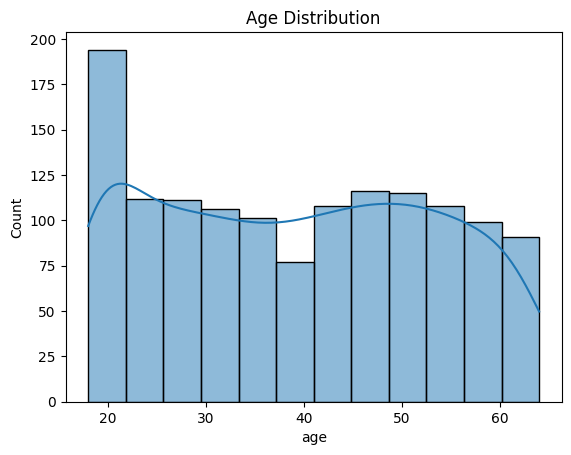

In [12]:
sns.histplot(insurance_data['age'], kde=True)
plt.title('Age Distribution')
plt.show()

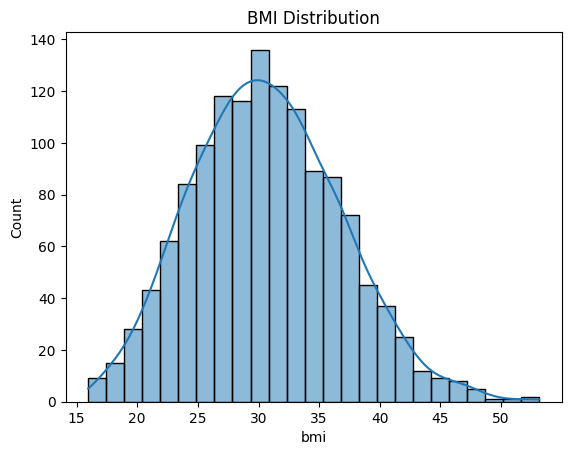

In [13]:
sns.histplot(insurance_data['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

the normal BMI range --> 18.5 to 24.9

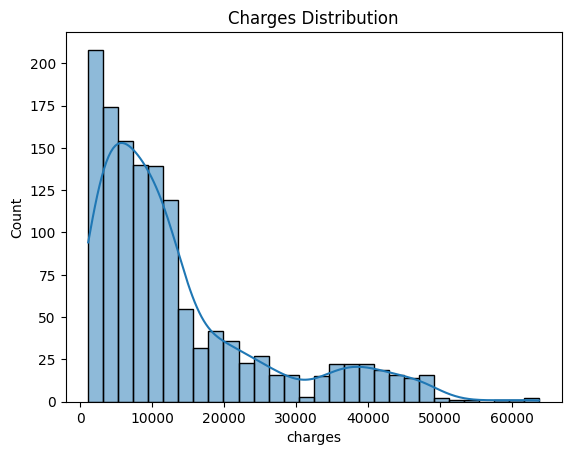

In [14]:
sns.histplot(insurance_data['charges'], kde=True)
plt.title('Charges Distribution')
plt.show()

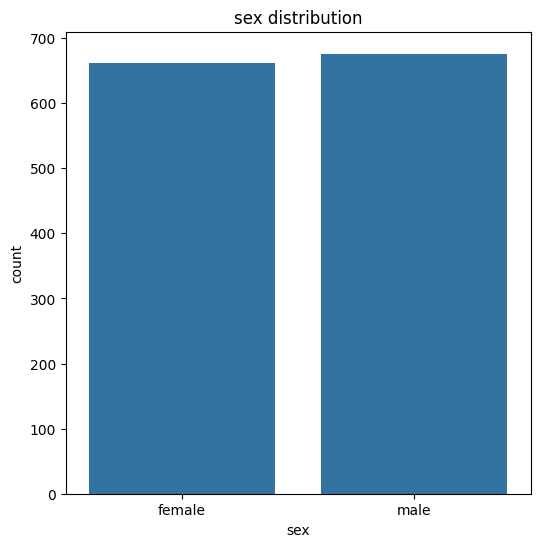

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_data)
plt.title("sex distribution")
plt.show()

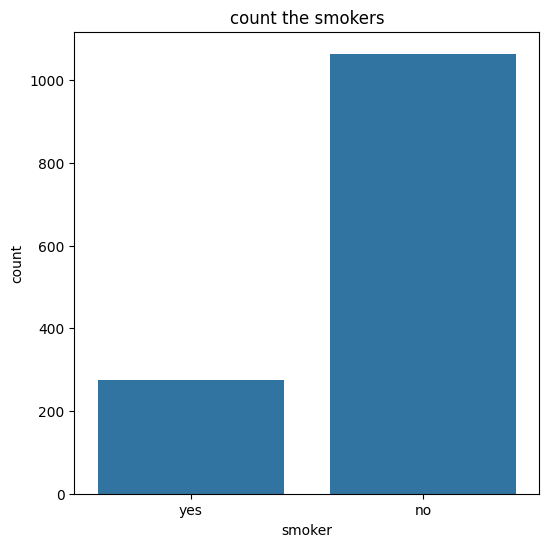

In [25]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_data)
plt.title('count the smokers')
plt.show()

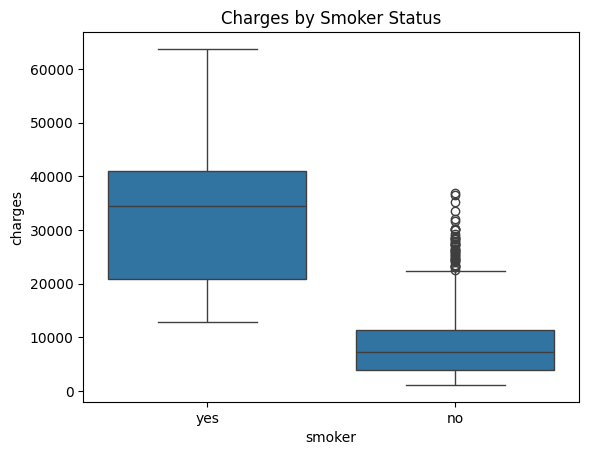

In [15]:
sns.boxplot(x='smoker', y='charges', data=insurance_data)
plt.title('Charges by Smoker Status')
plt.show()

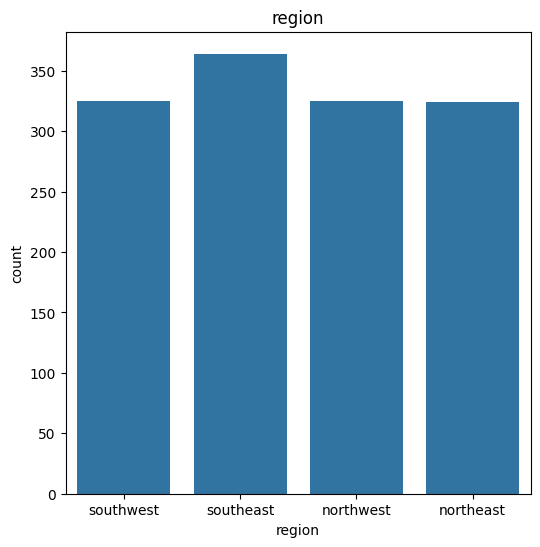

In [26]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_data)
plt.title('region')
plt.show()

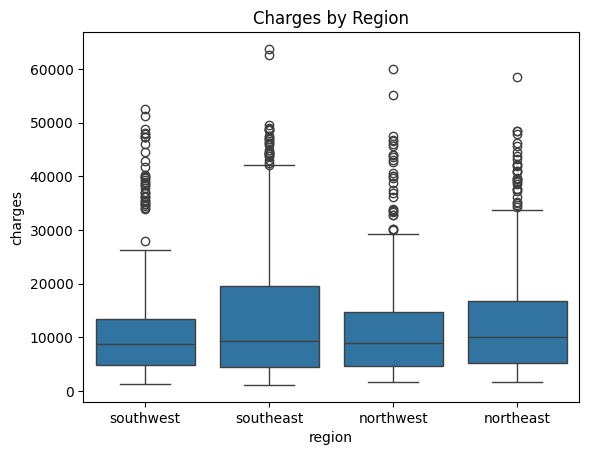

In [16]:
sns.boxplot(x='region', y='charges', data=insurance_data)
plt.title('Charges by Region')
plt.show()

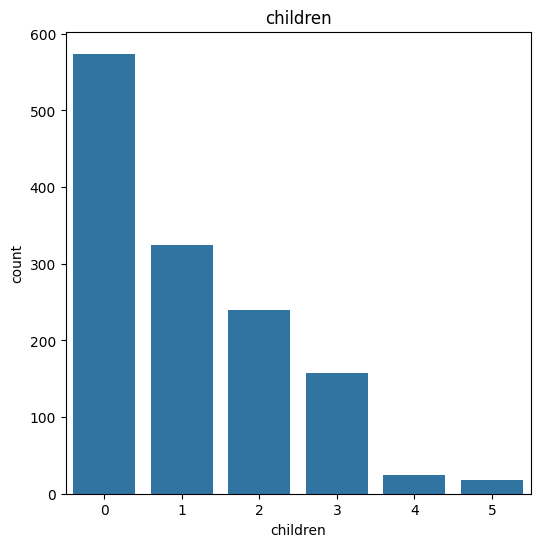

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_data)
plt.title('children')
plt.show()

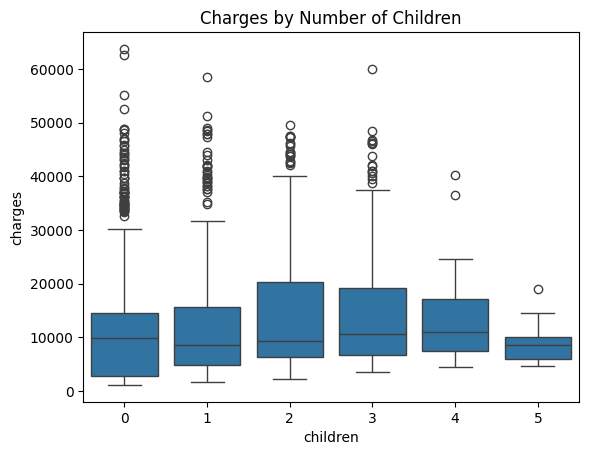

In [17]:
sns.boxplot(x='children', y='charges', data=insurance_data)
plt.title('Charges by Number of Children')
plt.show()

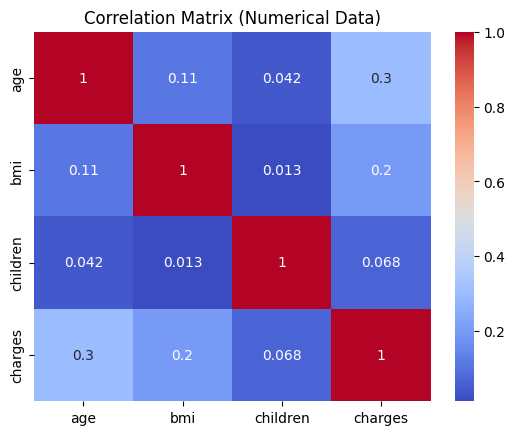

In [20]:
# Select only numerical columns
numerical_data = insurance_data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Data)')
plt.show()


In [19]:
average_charges_smoker = insurance_data[insurance_data['smoker'] == 'yes']['charges'].mean()
average_charges_non_smoker = insurance_data[insurance_data['smoker'] == 'no']['charges'].mean()
print(f"Average charges for smokers: {average_charges_smoker}")
print(f"Average charges for non-smokers: {average_charges_non_smoker}")

Average charges for smokers: 32050.23183153284
Average charges for non-smokers: 8434.268297856204


data preprocessing

encoding the catigorical features

In [27]:
from sklearn.preprocessing import LabelEncoder

In [29]:
labelencoder=LabelEncoder()

In [30]:
sex=labelencoder.fit_transform(insurance_data.sex)

In [31]:
insurance_data['sex']=sex

In [32]:
smoker=labelencoder.fit_transform(insurance_data.smoker)

In [33]:
insurance_data['smoker']=smoker

In [36]:
region=labelencoder.fit_transform(insurance_data.region)

In [37]:
insurance_data['region']=region

In [38]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


splitting the features and target

In [39]:
x=insurance_data.drop(columns='charges',axis=1)
y=insurance_data['charges']

In [40]:
print(x,y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns] 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [43]:
x.shape,x_train.shape,x_test.shape

((1338, 6), (1070, 6), (268, 6))

fit the model

In [44]:
model=LinearRegression()

In [45]:
model.fit(x_train,y_train)

LinearRegression()

evaluate the model

In [46]:
x_train_prediction=model.predict(x_train)
x_train_accuracy=metrics.r2_score(x_train_prediction,y_train)
print("the train R square value",x_train_accuracy)

the train R square value 0.6701992676115631


In [47]:
x_test_prediction=model.predict(x_test)
x_test_accuracy=metrics.r2_score(x_test_prediction,y_test)
print("the train R square value",x_test_accuracy)

the train R square value 0.6621668246589305


bulding a predictive system

In [51]:
Input_data=(18	,'male',	33.8,	1,	'no'	,'southeast')

sex_mapping = {'male': 0, 'female': 1}
smoker_mapping = {'no': 0, 'yes': 1}
region_mapping = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}


Input_data_encoded = [
    Input_data[0],  # age
    sex_mapping[Input_data[1]],  # sex
    Input_data[2],  # bmi
    Input_data[3],  # children
    smoker_mapping[Input_data[4]],  # smoker
    region_mapping[Input_data[5]]  # region
]

# Convert to NumPy array
Input_data_as_numpy_array = np.asarray(Input_data_encoded)

# Reshape for prediction
Input_data_reshaped = Input_data_as_numpy_array.reshape(1, -1)

# Perform prediction
prediction = model.predict(Input_data_reshaped)
print(f"Prediction: {prediction}")


Prediction: [4222.30109434]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
